In [2]:
!pip install mglearn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
import mglearn

# 경고메시지 무시
import warnings
warnings.filterwarnings(action='ignore')
# action = 'default' 경고메시지 표시

## 데이터셋 로딩

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

### Iris dataset 탐색

In [5]:
iris.keys()

# target 은 0과1로 정형화되어있고
# target_names가 그 이름을 갖고잇음
# feature_names 입력데이터의 각각의 feature들의 이름을 갖고잇음
# DESCR : description 설명

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(iris['DESCR'])
# print로 둘러싸니까 더 보기편하게 나옴

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
type(iris['data'])

numpy.ndarray

In [10]:
iris['data'].shape
# 150개의 데이터와 4개의 피처

(150, 4)

In [11]:
iris['data'][:5]
# 앞에서 5개만 보기

# ['sepal length (cm)',
#  'sepal width (cm)',
#  'petal length (cm)',
#  'petal width (cm)']
# 이 순으로 나옴

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
# 데이터 프레임으로

In [59]:
type(iris)

sklearn.utils.Bunch

In [13]:
df.tail(10)
# species보면 샘플의 편향이 일어날 가능성이 있으니 섞을까

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [14]:
# species에 어떤 값이 있나 살펴보자
# value_counts() : 개별 요소의 건수를 반환하는 함수
# 얘가 더 많이 쓰이긴 함
# 여기선 unique
# 중복값을 제거하고 고유값만 가져옴
df['species'].unique()
# 차례대로 ['setosa', 'versicolor', 'virginica']

array([0, 1, 2])

In [15]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
# 조건에 따라 이름이 달라지잖아.. 조건에 따라... if문
# 150개의 데이터중  iris 세 종류가 딱 3분의 1씩 떨어지나?
df['species'][:50] = 'setosa'
df['species'][50:100] = 'versicolor'
df['species'][100:] = 'virginica'

In [17]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 훈련세트와 테스트세트로 분리

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)
# test_size 옵션안쓰면 75:25 디폴트값으로 사이즈 나눠짐

In [19]:
X_train.shape, X_test.shape
# 8:2로 잘 쪼개졋는지 확인

((120, 4), (30, 4))

### 분류 알고리즘 : 의사결정트리(DecisionTreeClassifier)
  - 분류와 회귀에 사용되는 지도학습 알고리즘
  - 데이터 특성으로부터 추론된 결정규칙을 통해 값을 예측
  - if-then-else 결정 규칙을 통해 데이터 학습
  - 트리의 깊이가 깊을수록 복잡한 모델이 된다
  - 결정트리의 장점
    - 이해와 해석이 쉽다
    - 시각화가 용이하다
    - 많은 데이터의 전처리가 필요하지 않다
    - 수치형과 범주형 데이터 모두를 다룰 수 있다
  - 결정트리의 단점
    - 트리를 만들때 규제를 주지않으면 한없이 깊은 트리가 만들어진다
    - 그래서 과대적합이 되기 쉽다

In [20]:
# 결정트리 만들기
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=121)
# 수업하니까 담는거지 실전에 가면 random_state안주는 경우가 많음
dtree.fit(X_train, y_train)
# 지도학습은 문제와 답을 같이 담아야 한다

DecisionTreeClassifier(random_state=121)

#### 트리 구조를 시각화하는 패키지 graphviz

In [21]:
import graphviz

In [22]:
from sklearn.tree import export_graphviz
# 트리로 구현한것을 파일로 내보내는 패키지
# export_graphviz(모델객체, 출력파일명, 결정트리 클래스명칭, 결정트리 피쳐명칭, 옵션)
export_graphviz(dtree, out_file='tree.dot', class_names=iris.target_names,
               feature_names=iris.feature_names, impurity=True, filled=True)
# 'tree.dot'는 관용적인 표현이니까 바꿔도 됨
# impurity부터 옵션은 없어도 됨

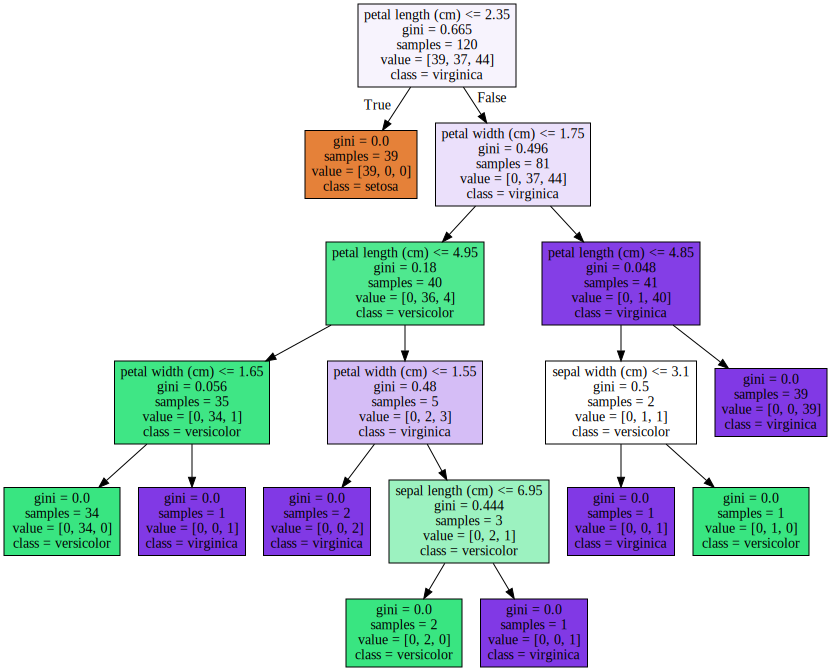

In [23]:
# 파일입출력 순서가 있는데 귀찮으면 with와 함께 씀
# open(filename, mode)
# mode : r(default값-읽기전용), w(쓰기전용), a(추가)
# r은 파일이 꼭 있어야 되는데 w, a는 파일이 없으면 만들어줌
# graphviz 파이썬 래퍼 모듈을 호출해 결정트리 규칙을 시각화한다
with open('tree.dot')as f:
    dot_graph = f.read()
    
src = graphviz.Source(dot_graph)
# 클래스의 생성자 매개변수로 dot_graph가 넘어간것..
# 그거를 src에 담음
src

In [24]:
# 결정트리를 pdf 파일로 생성 : Source.gv, Source.gv.pdf 두개의 파일이 생성된다
src.view()

'Source.gv.pdf'

In [25]:
# 트리에서 색이 진한 노드는 불순도가 적고 없는것(순수한 자기 객체로만 이뤄짐)

In [26]:
# min-samples-leaf : 자식을 갖고있지않는 노드
# == 클래스의 분할이 끝난것. 가지치기 끝

In [27]:
# 시드값에 연도 담는 사람도 많대
# 지금은 쌤이랑 맞추려고 따라하지만

In [28]:
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))
# 과대적합을 의심해봐야함
# 책에 있는 하이퍼 파라미터를 조정해가면서..

1.0
1.0


### DecisionTree의 중요 하이퍼 파라미터 조정

In [29]:
model = DecisionTreeClassifier(min_samples_split=4, random_state=121)
model.fit(X_train, y_train)
# min_samples_split 값을 주고 다시 피팅해봄

DecisionTreeClassifier(min_samples_split=4, random_state=121)

In [30]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
# 쪼끔 줄어들었음..
# 과대적합이 약간 준것같긴한데 여전히 높다

0.9833333333333333
0.9666666666666667


### feature별 결정 트리 알고리즘의 중요도

In [31]:
model.feature_importances_
# 기본적으로 갖고있는게 아니라 모델에 학습을 시켜야지만 쓸 수 있음
# 어떤 피처(?)가 가장 중요한 영향을 미치는지 알아보기
# 근데 결과가 너무 극단적이라 다시 확인

array([0.        , 0.        , 0.56028618, 0.43971382])

In [35]:
# 가져올 곳이 여러군데면 zip으로 묶어서 가져올 수 있음
for name, value in zip(iris.feature_names, model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))
# {}단위가 길것같아서 :.3f로 소숫점 셋째짜리까지 잘라서 가져옴
# 결과를 보니 petal length가 가장 영향력이 큰 피처엿음

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.560
petal width (cm) : 0.440


### feature별 중요도 시각화

<AxesSubplot:>

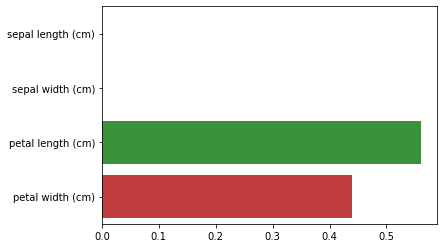

In [36]:
import seaborn as sns
sns.barplot(model.feature_importances_, iris.feature_names)
# 라벨링이 x축, 값이 막대그림의 높이를 나타내는 y축이 되니까
# 거꾸로 넣어줘야 함

### 가지치기(Prunning)
1. Tree Prunning : 의사결정 트리모델의 과적합(Overfitting)을 줄이고, 일반화 가능성을 증대시킬 수 있는 subtree를 찾는 과정
2. 가지치기 방법
  - cross-validation
  - independent validation set
3. Prunning Logic
  - 가지치기 과정에서는 트리 해당 데이터셋에 과도하게 최적화되지 않도록 결정트리의 최대깊이를 제한하고, lesf node의 최대 개수를 제한한다.
  - 노드를 분할시키기 위해 필요한 '최소한의 데이터 개수'를 지정한다

In [40]:
# 결정트리에서 가지치기를 하는 가장 간단한 방법은 트리의 깊이를 지정하는 것이다
model = DecisionTreeClassifier(max_depth=3, random_state=2022)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
# max_depth = 3 

0.9666666666666667
0.9666666666666667


In [43]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, random_state=2022)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
# max_depth=3, min_samples_leaf=6
# 조금씩 줄고 있음

0.9583333333333334
0.9666666666666667


### 교차검증(cross-validation)

In [44]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X_train, y_train)
scores
# 우리가 보고싶은건 test_score 의 평균값

{'fit_time': array([0.00198984, 0.00111866, 0.00099897, 0.00090313, 0.00099802]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.95833333, 0.91666667, 1.        , 0.95833333, 0.91666667])}

In [45]:
np.mean(scores['test_score'])
# 96 -> 95로 내려간 점수

0.95

In [48]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(model, X_train, y_train, cv = StratifiedKFold())
# cv에 분할기로 사용할 이름을 담기(StratifiedKFold)
np.mean(scores['test_score'])

0.95

#### 그리드 서치(Grid Search)
- 결정 트리의 하이퍼 파라미터 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾는 작업
- 테스트 세트를 사용하지 않고 교차검증을 통해서 좋은 모델을 고르면 된다

In [50]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state = 2022)

params = {
    'max_depth':[2, 3, 4, 5, None],
    'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10]
}
# None : 깊이 제한을 안준것

gs = GridSearchCV(model, param_grid = params, cv = 3, refit = True, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [51]:
model = gs.best_estimator_
# 우리가 가진 값중 최적의 값을 가지고 알아서 모델을 만들라는 뜻
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
# 오히려 조금 올라갓네.. 이게 최적이라는 뜻인데..
# 썩 마음에 들지않네

0.9666666666666667
0.9666666666666667


In [53]:
# 학습을 통해 얻어진 매개변수는 뒤에 _ 붙인다
# 그리드 서치를 통해 찾은 최적의 하이퍼 파라미터값

print(gs.best_params_)
print(gs.best_score_)
# 최적의 점수도 보여달라
# 엥 0.94네 위에 점수랑 같아야 하는데?

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9499999999999998


In [54]:
# 최상의 교차검증 점수
np.max(gs.cv_results_['mean_test_score'])
# 위랑 같네 잘나옴

0.9499999999999998

In [58]:
# 모델 다시 만들어보기

model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=2022)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# 최적의 파라미터값으로 다시 돌려봣는데 
# 아 random_state 값이 다르구나
# 그렇게 치면 과대적합문제는 점점 해소되고 있는것 같은데
# 애초에 데이터가 많지 않아서 한계가 있는 듯

0.9666666666666667
0.9666666666666667
